<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        STARTUP DATASET ANALYSIS
    </h1>
    </div>

<h2 align="center"><font color=#2067d4> Exploratory Data Analysis (EDA) Project</font></h2> 

---


<h1 align="left"><font color=#20a0ff>Introduction </font></h1> 

- India has one of the fastest-growing economies in the world. Many new and innovative startups are emerging, and they are receiving a lot of funding.
- In this notebook, we will explore the data on Indian startup funding to understand more about this ecosystem and how it has changed over time.

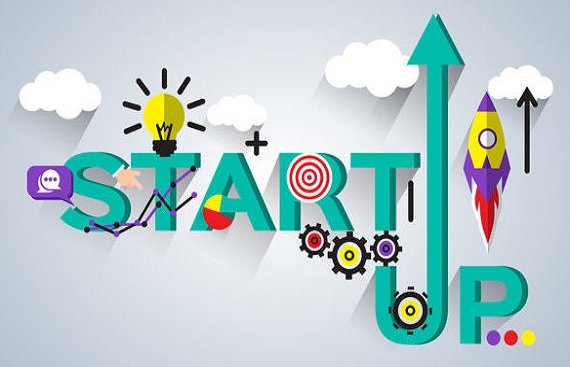

---

<h2 align="left"><font color=dodgerblue> Objectives </font></h2>
  

- **How Does the Funding Ecosystem changes with respect to Time?**
- **What is the General Amount that Startups get in India?**
- **Which Kind of Industries are more preferred for Startups?**
- **Does Location also play a role, In determining the Growth of a Startup?**
- **Who plays the main role in Indian Startups Ecosystem?**
- **What are the different Types of Funding for Startups?**

---
      
<h2 align="left"><font color=#20a0ff>About the Datasets </font></h2>    
 
- **Dataset:** 'startup_funding.csv'
- **Content:** This dataset contains information about funding provided to startups in India.
- **Rows:** 3044    
- **Columns:** 10   

   INPUT:

**- ``Sr No``** - Serial number for each entry<br>
**- ``Date dd/mm/yyyy``** - The date when the funding was provided, in the format dd/mm/yyyy<br>
**- ``Startup Name``** - The name of the startup that received funding<br>
**- ``Industry Vertical``** - The industry or sector in which the startup operates, such as technology, healthcare, e-commerce, etc.<br>
**- ``SubVertical``** - A more specific category within the industry, providing additional details about the startup's focus<br>
**- ``City  Location``** - The city or location where the startup is based<br>
**- ``Investors Name``** - The names of the investors or venture capital firms that provided the funding<br>
**- ``InvestmentnType``** - The type of investment, such as Seed Funding, Series A, Series B, etc.<br>
**- ``Amount in USD``** - The amount of funding received by the startup, typically expressed in US dollars<br>
**- ``Remarks``** - Any additional remarks or notes about the funding round or the startup<br>

<a id='eda'></a>
# <font color=#20a0ff> <b>  Exploratory Data Analysis (EDA)</b><font color='orange'>

## Data Reading & Cleaning

### Import Libraries
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [90]:
# Importing dataset
df0 = pd.read_csv('startup_funding.csv')
df = df0.copy()



<a id='understanding'></a>
## Understanding the Data

In [92]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [93]:
# (rows, columns)
df.shape

(3044, 10)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr No,"3,044.00","1,522.50",878.87,1.00,761.75,"1,522.50","2,283.25","3,044.00"


<a id='missing'></a>
## Check the Missing Values

In [97]:
from skimpy import skim

In [98]:
skim(df) # summarieses the dataFrame 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3044   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0   ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Sr No            │    0 │      0 │   1522 │    878.9 │    1 │   761.8 │   1522 │   2283 │   3044 │ ▇▇▇▇▇▇  │  │
│ └──────────────────┴──────┴────────┴────────┴──────────┴──────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %       ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date dd/mm/yyyy                 │         0 │          0 │                        1 │                 3044 │  │
│ │ Startup Name                    │         0 │          0 │                      1.3 │                 3877 │  │
│ │ Industry Vertical               │       171 │       5.62 │                        2 │                 6087 │  │
│ │ SubVertical                     │       936 │      30.75 │                      2.7 │                 8331 │  │
│ │ City  Location                  │       180 │       5.91 │                      1.1 │                 3361 │  │
│ │ Investors Name                  │        24 │       0.79 │                      4.6 │                14016 │  │
│ │ InvestmentnType                 │         4 │       0.13 │                        2 │                 6224 │  │
│ │ Amount in USD                   │       960 │      31.54 │                     0.68 │                 2084 │  │
│ │ Remarks                         │      2625 │      86.24 │                     0.32 │                  973 │  │
│ └─────────────────────────────────┴───────────┴────────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='missing'></a>
## Check the Missing Values

In [100]:
df.duplicated().sum()

0

<a id='fe'></a>
## <font color=#20a0ff> <b> Clean and Prepare the Data </b><font color='orange'>

<a id='rename'></a>
### Rename the Columns

In [103]:
# Rename columns
df.rename(columns={
    "Sr No": "sr_No",
    "Date dd/mm/yyyy": "date",
    "Startup Name": "startup_name",
    "Industry Vertical": "industry_vertical",
    "SubVertical": "sub_vertical",
    "City  Location": "city_location",
    "Investors Name": "undisclosed_investor",
    "InvestmentnType": "investment_type",
    "Amount in USD": "amount_USD",
    "Remarks": "remarks"
}, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sr_No                 3044 non-null   int64 
 1   date                  3044 non-null   object
 2   startup_name          3044 non-null   object
 3   industry_vertical     2873 non-null   object
 4   sub_vertical          2108 non-null   object
 5   city_location         2864 non-null   object
 6   undisclosed_investor  3020 non-null   object
 7   investment_type       3040 non-null   object
 8   amount_USD            2084 non-null   object
 9   remarks               419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


<a id='datetime'></a>
### Date-Time Transformations

In [106]:
# Fix the values in the date column

df['date'][df['date']=='01/07/015'] = '01/07/2015'
df['date'][df['date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['date'][df['date']=='12/05.2015'] = '12/05/2015'
df['date'][df['date']=='13/04.2015'] = '13/04/2015'
df['date'][df['date']=='15/01.2015'] = '15/01/2015'
df['date'][df['date']=='22/01//2015'] = '22/01/2015'
df['date'][df['date']=='05/072018'] = '05/07/2018'


# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract year and month from date(float)
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)

In [107]:
min_year = df['year'].min()
max_year = df['year'].max()

min_month = df[df['year'] == min_year]['month'].min()
max_month = df[df['year'] == max_year]['month'].max()

min_year_month = (min_year, min_month)
max_year_month = (max_year, max_month)

print("Minimum year-month:", min_year_month)
print("Maximum year-month:", max_year_month)

# The data is available from January 2015 till January 2020

Minimum year-month: (2015, 1)
Maximum year-month: (2020, 1)


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sr_No                 3044 non-null   int64         
 1   date                  3044 non-null   datetime64[ns]
 2   startup_name          3044 non-null   object        
 3   industry_vertical     2873 non-null   object        
 4   sub_vertical          2108 non-null   object        
 5   city_location         2864 non-null   object        
 6   undisclosed_investor  3020 non-null   object        
 7   investment_type       3040 non-null   object        
 8   amount_USD            2084 non-null   object        
 9   remarks               419 non-null    object        
 10  year                  3044 non-null   int32         
 11  month                 3044 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 261.7+ KB


In [109]:
df.sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,remarks,year,month
1625,1626,2016-06-21,Cleartrip,Consumer Internet,Online Travel Agency,Mumbai,"Concur Technologies, Gund Investment",Private Equity,NaN,NaN,2016,6
2039,2040,2016-01-12,Happy2Refer,Consumer Internet,Mobile based Referral Platform,Mumbai,"Equity Crest, Vinners, Sparknext",Seed Funding,"2,50,000",NaN,2016,1
990,991,2017-03-31,Oriano Solar,Technology,Turnkey Solar Solutions,Mumbai,Samridhi Fund,Private Equity,"30,00,000",NaN,2017,3


### Handling Missing and Incorrect Values

In [111]:
# Missing volues percentage:

(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

remarks                 86.24 %
amount_USD              31.54 %
sub_vertical            30.75 %
city_location            5.91 %
industry_vertical        5.62 %
undisclosed_investor     0.79 %
investment_type          0.13 %
sr_No                     0.0 %
date                      0.0 %
startup_name              0.0 %
year                      0.0 %
month                     0.0 %
dtype: object

#### `Amount_USD`

In [113]:
# Replace commas(,) in the 'amount_USD' column
df['amount_USD'] = df['amount_USD'].apply(lambda x: str(x).replace(',', ''))


# Correct invalid values in the 'amount_USD' column
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("unknown", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("14342000+", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
df['amount_USD'] = df['amount_USD'].apply(lambda x : str(x).replace("nan", "0"))


In [114]:
# Convert to numeric
df['amount_USD'] = pd.to_numeric(df['amount_USD'], errors='coerce')

# Replace 0 values in 'amount_USD' with NaN
df['amount_USD'] = df['amount_USD'].replace(0, np.nan)

# Replace NaN values with the mean
df['amount_USD'].fillna(df['amount_USD'].mean(), inplace=True)

In [115]:
# 'Amount in USD' normalization

df['amount_USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

amount_USD
18,429,897.27    32.16 %
1,000,000.00      5.45 %
500,000.00        3.55 %
2,000,000.00      2.27 %
3,000,000.00      2.17 %
5,000,000.00      2.17 %
10,000,000.00     1.97 %
100,000.00        1.87 %
150,000.00        1.48 %
200,000.00        1.45 %
Name: proportion, dtype: object

In [116]:
# Set pandas option to display numbers in standard notation
pd.options.display.float_format = '{:,.2f}'.format

amount_usd_min_max = df['amount_USD'].agg(['min', 'max'])

print(amount_usd_min_max)

min          16,000.00
max   3,900,000,000.00
Name: amount_USD, dtype: float64


In [117]:
df.sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,remarks,year,month
950,951,2017-03-08,Supr Daily,Consumer Internet,Subscription based Home Delivery Platform,Mumbai,Y Combinator,Seed Funding,"120,000.00",NaN,2017,3
2267,2268,2015-11-24,Naaptol,Online and TV Shopping Marketplace,NaN,Mumbai,"Mitsui & Co., New Enterprise Associates, Canaa...",Private Equity,"52,000,000.00",Late Stage,2015,11
2658,2659,2015-07-30,MadRat Games,Educational Board Games,NaN,Bangalore,"Kunal Bahl, Rohit Bansal",Seed Funding,"168,000.00",NaN,2015,7


#### `Remarks`

In [119]:
# 86.24% of the 'remarks' column consists of missing values, so we are dropping this column

df.drop('remarks', axis = 1, inplace = True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sr_No                 3044 non-null   int64         
 1   date                  3044 non-null   datetime64[ns]
 2   startup_name          3044 non-null   object        
 3   industry_vertical     2873 non-null   object        
 4   sub_vertical          2108 non-null   object        
 5   city_location         2864 non-null   object        
 6   undisclosed_investor  3020 non-null   object        
 7   investment_type       3040 non-null   object        
 8   amount_USD            3044 non-null   float64       
 9   year                  3044 non-null   int32         
 10  month                 3044 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 237.9+ KB


#### `City_Location`

In [122]:
# Replace 'Bengaluru' with the more commonly known name 'Bangalore'

df.loc[df['city_location'] == 'Bengaluru', 'city_location'] = 'Bangalore'

In [123]:
df.loc[df['city_location'] == 'Bangalore'].sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
983,984,2017-03-29,Byju\\xe2\\x80\\x99s,Consumer Internet,Online Education Platform,Bangalore,Verlinvest,Private Equity,"18,429,897.27",2017,3
1132,1133,2016-12-07,Vehico,Technology,Connected Transportation solutions,Bangalore,"Calcutta Angel Network, Appliyifi",Seed Funding,"18,429,897.27",2016,12
535,536,2017-10-09,MyGubbi,eCommerce,Home Interior Designing Seller,Bangalore,"Firoze Irani, Vipul Parekh, Ananda Kallugadde,...",Private Equity,"2,700,000.00",2017,10


#### `Undisclosed_Investors`

In [125]:
# Replace the name 'Undisclosed investors' in the 'investors_name' column with 'Undisclosed Investors'

df.loc[df['undisclosed_investor'] == 'Undisclosed investors', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'Undisclosed Investor', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'undisclosed investors', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'undisclosed investor', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'Undisclosed', 'undisclosed_investor'] = 'Undisclosed Investors'

In [126]:
df[df['undisclosed_investor'] == 'Undisclosed Investors'].shape

(106, 11)

In [127]:
df.sample(5)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
2459,2460,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,"680,000,000.00",2015,9
2247,2248,2015-11-18,Hipship,Express local delivery platform,NaN,Bangalore,"Inara Capital , Rishi Khiani",Seed Funding,"18,429,897.27",2015,11
2467,2468,2015-09-30,RedDoorz,Budget Accommodation Platform,NaN,Noida,Jungle Ventures,Seed Funding,"1,000,000.00",2015,9
924,925,2017-03-01,Ola,Consumer Internet,App based cab aggregator,Bangalore,SoftBank Group Corp,Private Equity,"330,000,000.00",2017,3
321,322,2018-03-05,MedGenome,Healthcare,"Genetic Screening, DNA Diagnostics Labs & Rese...",Bangalore,"HDFC Life, HDFC Asset Management",Private Equity,"10,000,000.00",2018,3


#### `Startup_name`

In [129]:
# Remove space in 'Ola Cabs'
df.loc[df['startup_name'] == 'Ola Cabs', 'startup_name'] = 'OlaCabs'

In [130]:
df['startup_name'][df['startup_name'] == 'OlaCabs'].shape 

(8,)

#### `Industry_vertical`

In [132]:
# List unique values in the 'industry_vertical' column as a series and sort them alphabetically
unique_industry_verticals_series = pd.Series(df['industry_vertical'].unique()).sort_values().reset_index(drop=True)
print(unique_industry_verticals_series)

0                      360-degree view creating platform
1                                3D Printer Manufacturer
2                                                     AI
3                                  API Workflow platform
4                                             Accounting
                             ...                        
817           us ticketing and fleet management platform
818                           usiness expense management
819    virtual reality, 3d simulation and stereoscopi...
820                 visual search and discovery platform
821                                                  NaN
Length: 822, dtype: object


In [133]:
# Replace 'ECommerce' and 'eCommerce' with 'E-Commerce' in the 'industry_vertical' column
df['industry_vertical'] = df['industry_vertical'].replace(['ECommerce', 'eCommerce'], 'E-Commerce')

In [134]:
df.loc[df['industry_vertical'] == 'E-Commerce'].shape

(276, 11)

#### `Investment_type`

In [136]:
# Replace less common terms with more widely used terms in 'investment_type' column
df.loc[df['investment_type'] == 'Seed/ Angel Funding', 'investment_type'] = 'Seed / Angel Funding'
df.loc[df['investment_type'] == 'Seed\nFunding',      'investment_type'] = 'Seed Funding'
df.loc[df['investment_type'] == 'Seed/Angel Funding',  'investment_type'] = 'Seed / Angel Funding'
df.loc[df['investment_type'] == 'Angel / Seed Funding','investment_type'] = 'Seed / Angel Funding'


In [137]:
df['investment_type'] = df['investment_type'].replace('Seed\nFunding', 'Seed Funding', regex=True)

In [138]:
df.loc[df['investment_type'] == 'Seed Funding'].shape

(1355, 11)

In [139]:
df['investment_type'].value_counts().head(10)

investment_type
Private Equity          1356
Seed Funding            1355
Seed / Angel Funding     138
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Series B                  20
Series C                  14
Series D                  12
Seed Round                 7
Name: count, dtype: int64

<a id='visualization'></a>
## <font color=#20a0ff> <b> Data Visualisation </b><font color='orange'>

###  How Does the Funding Ecosystem Changes with Respect to Time? 

In [142]:
# Aggregate data by year and month using existing columns
monthly_funding = df.groupby(['year', 'month']).agg(
    total_funding=('amount_USD', 'sum'),
    number_of_investments=('amount_USD', 'count'),
    average_funding=('amount_USD', 'mean')
).reset_index()

# Create a 'year_month' column for plotting
monthly_funding['year_month'] = pd.to_datetime(monthly_funding[['year', 'month']].assign(day=1))


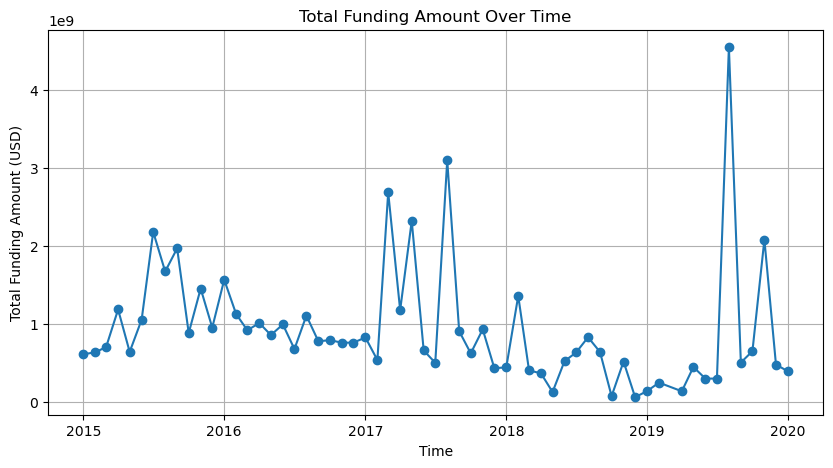

In [143]:
# Plot total funding amount over time
plt.figure(figsize=(10,5))
plt.plot(monthly_funding['year_month'], monthly_funding['total_funding'], marker='o', linestyle='-')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()


<font color=dodgerblue> 💡 Output:  Histogram of Bike Share Distribution</font>  

- **Fluctuations**: Noticeable fluctuations in total funding amounts between 2015 and 2020.
- **Peak**: Peak funding amount was observed in 2019.
- **Low Activity**: Low funding activity in late 2018 and early 2019.

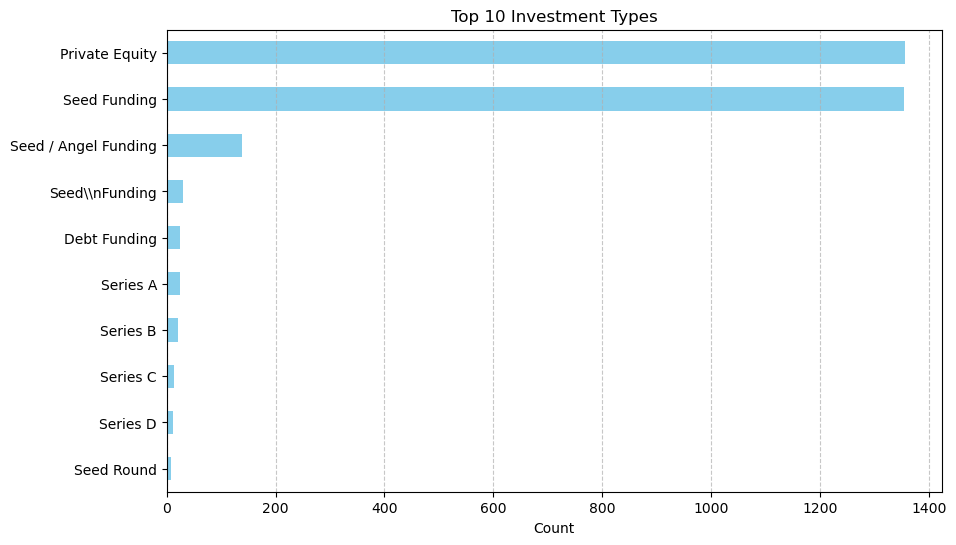

In [145]:
# Calculate the count of each investment type and select the top 10

top_investment_types = df['investment_type'].value_counts().head(10).sort_values(ascending=True)


plt.figure(figsize=(10, 6))
top_investment_types.plot(kind='barh', color='skyblue')
plt.title('Top 10 Investment Types')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

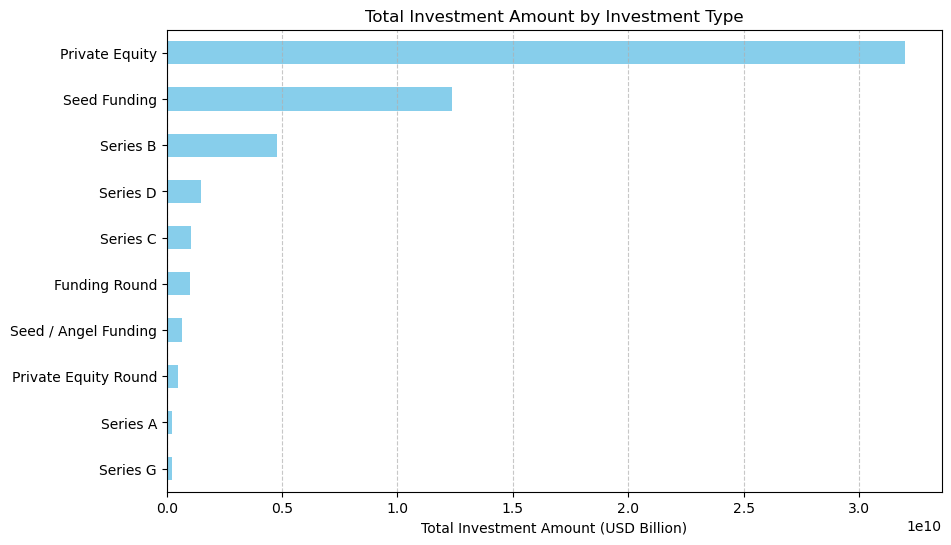

In [146]:
# Calculate the sum of investment amount for each investment type and select the top 10

top_investment_amounts = df.groupby('investment_type')['amount_USD'].sum().nlargest(10).sort_values(ascending=True)


plt.figure(figsize=(10, 6))
top_investment_amounts.plot(kind='barh', color='skyblue')
plt.title('Total Investment Amount by Investment Type')
plt.xlabel('Total Investment Amount (USD Billion)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

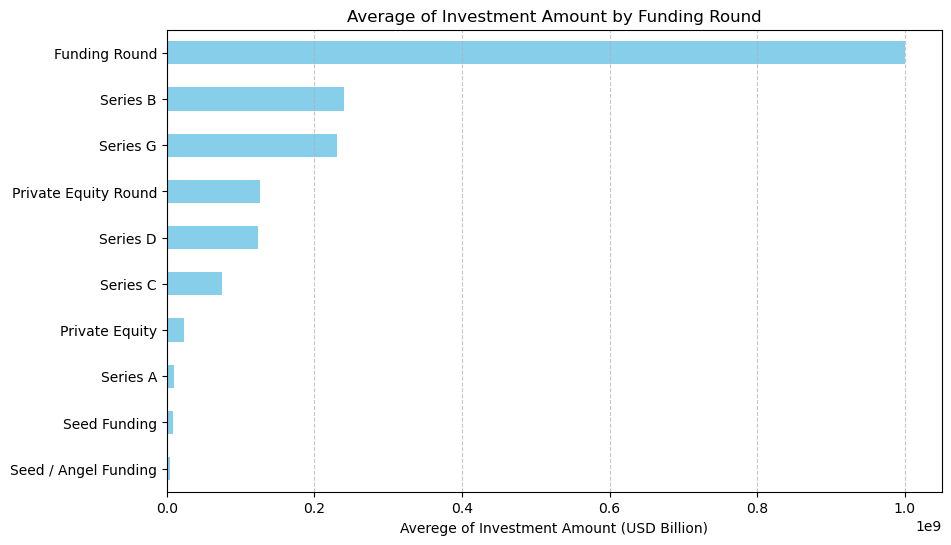

In [147]:
# Calculate the sum of investment amount for each investment type and select the top 10

top_investment_amounts = df.groupby('investment_type')['amount_USD'].sum().nlargest(10).index

# Calculate the mean investment amount for these top investment types
mean_investment_amounts = df[df['investment_type'].isin(top_investment_amounts)].groupby('investment_type')['amount_USD'].mean().sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
mean_investment_amounts.plot(kind='barh', color='skyblue')
plt.title('Average of Investment Amount by Funding Round')
plt.xlabel('Averege of Investment Amount (USD Billion)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

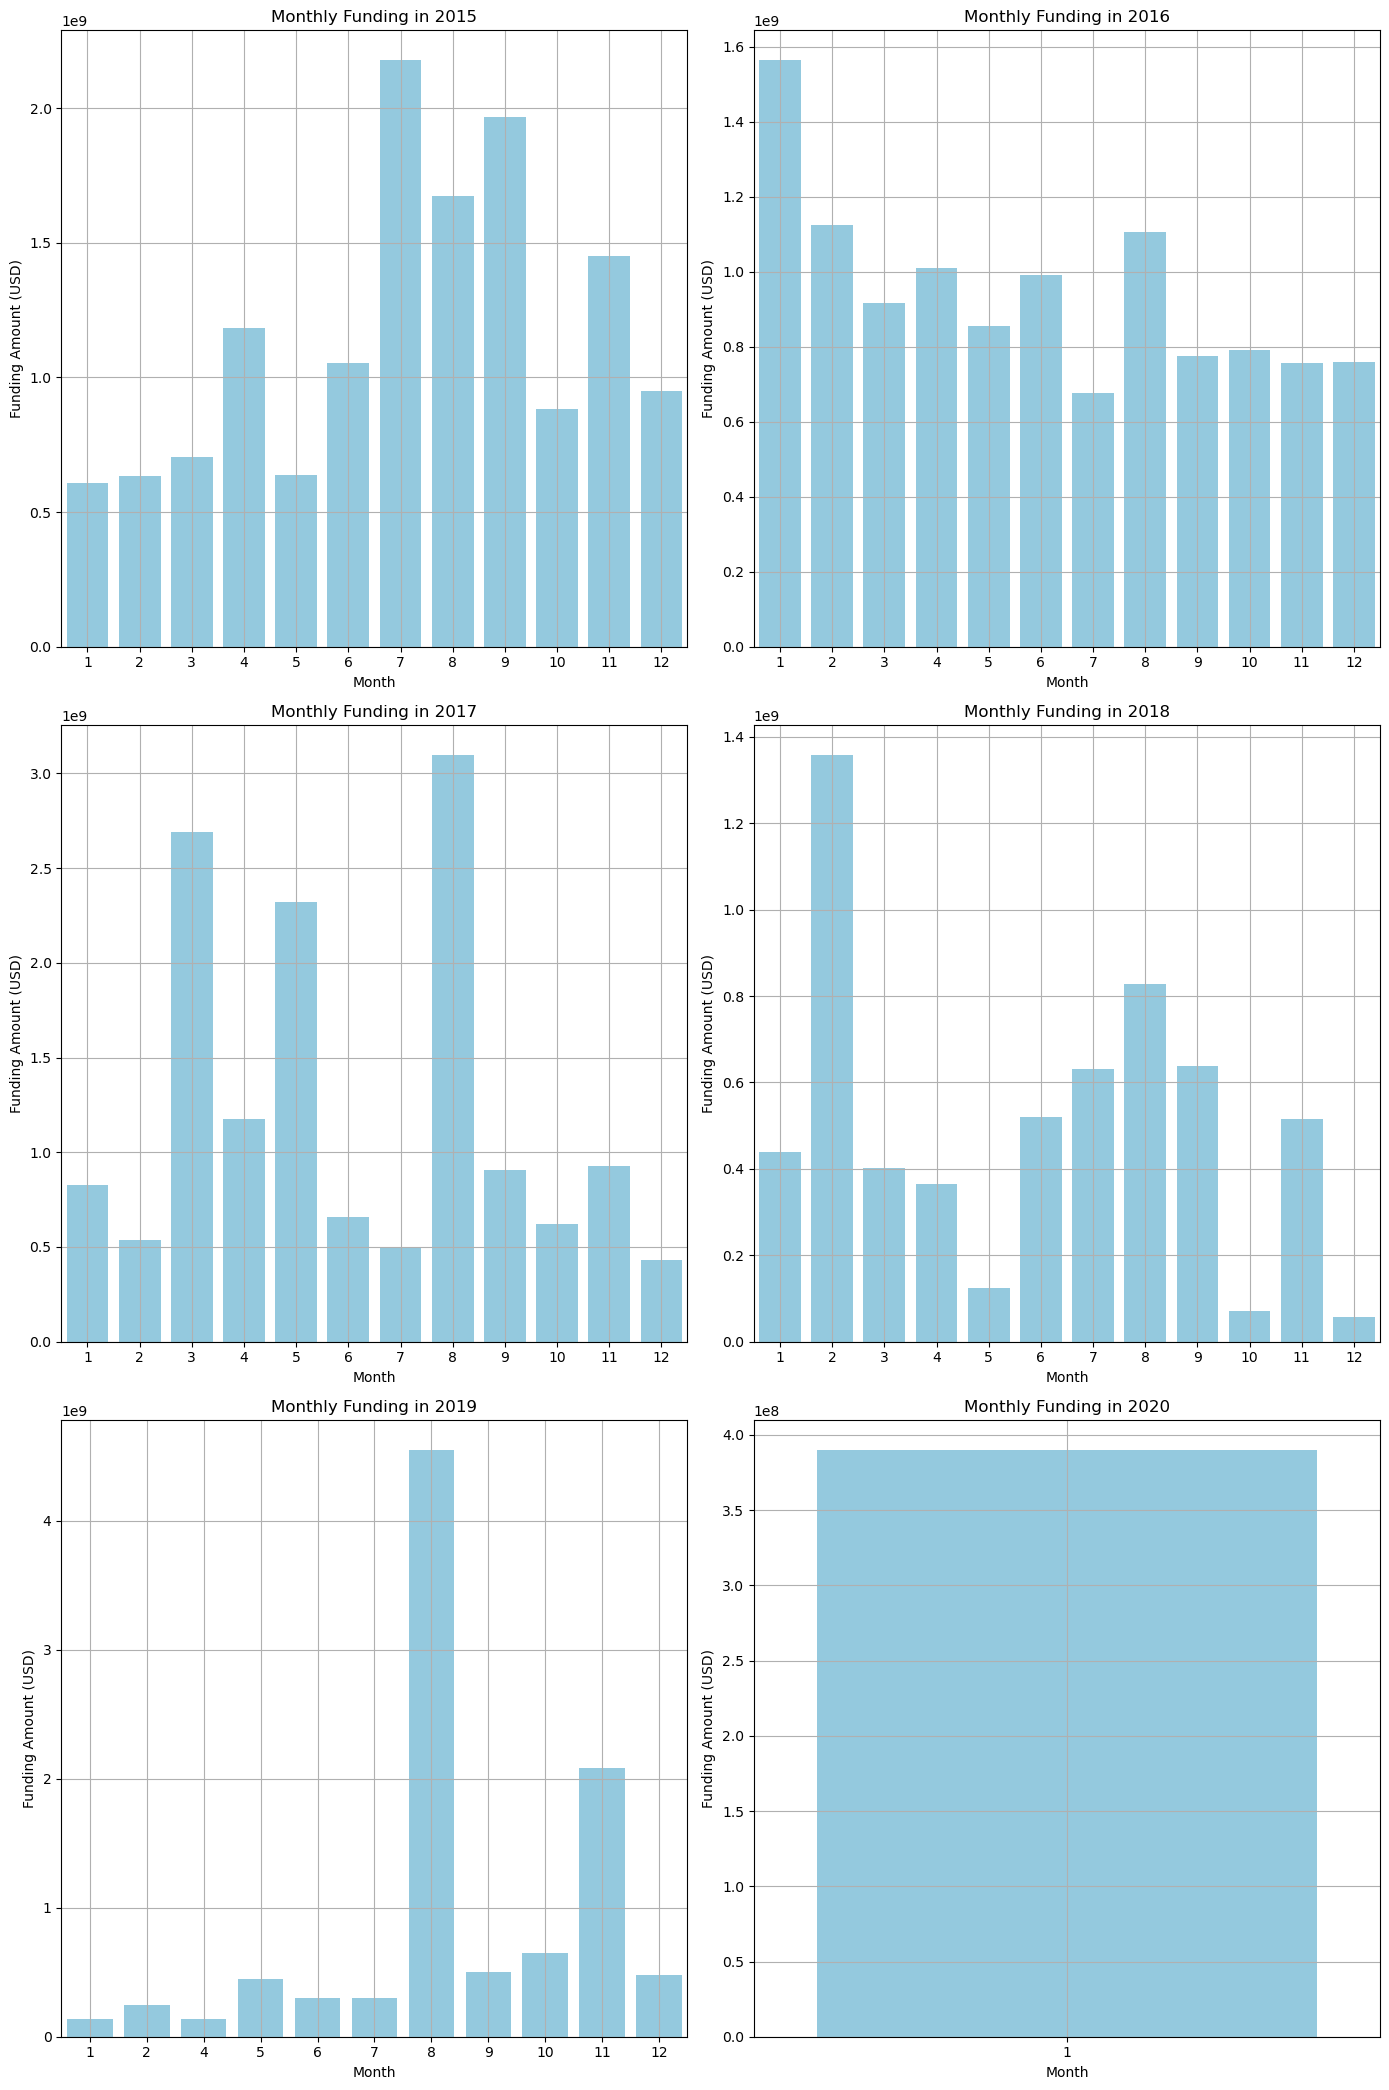

In [148]:

monthly_funding = df.groupby(['year', 'month'])['amount_USD'].sum().reset_index()


years = monthly_funding['year'].unique()


fig, axs = plt.subplots(len(years) // 2, 2, figsize=(14, 7 * (len(years) // 2)))
color = 'skyblue'
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.barplot(x='month',
                y='amount_USD',
                data=monthly_funding[monthly_funding['year'] == year],
                color=color,
                ax=axs[row, col])
    axs[row, col].set_title(f'Monthly Funding in {year}')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Funding Amount (USD)')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

# This analysis provides a clear view of how funding is distributed across months each year, 
# highlighting key periods of investment activity.

### What is the General Amount that Startups get in India?


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sr_No                 3044 non-null   int64         
 1   date                  3044 non-null   datetime64[ns]
 2   startup_name          3044 non-null   object        
 3   industry_vertical     2873 non-null   object        
 4   sub_vertical          2108 non-null   object        
 5   city_location         2864 non-null   object        
 6   undisclosed_investor  3020 non-null   object        
 7   investment_type       3040 non-null   object        
 8   amount_USD            3044 non-null   float64       
 9   year                  3044 non-null   int32         
 10  month                 3044 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 237.9+ KB


In [151]:
# Preview of the Top 10 Most Funded Initiatives

df['amount_USD'].sort_values(ascending = False).head(10)

60     3,900,000,000.00
651    2,500,000,000.00
966    1,400,000,000.00
830    1,400,000,000.00
31     1,000,000,000.00
2648     700,000,000.00
2459     680,000,000.00
188      600,000,000.00
33       585,000,000.00
2244     500,000,000.00
Name: amount_USD, dtype: float64

In [152]:
# Preview of the details of the 10 most funded Initiatives

df.sort_values(by = 'amount_USD', ascending = False).head(5)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,"3,900,000,000.00",2019,8
651,652,2017-08-11,Flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000.00",2017,8
966,967,2017-03-21,Flipkart,E-Commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000.00",2017,3
830,831,2017-05-18,Paytm,E-Commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000.00",2017,5
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,"1,000,000,000.00",2019,11


In [153]:
# Calculating the average funding received by a startup

df['amount_USD'].mean() 

18429897.27080872

In [154]:
# Preview of the least funded initiatives
df['amount_USD'].sort_values().head(10)

3020   16,000.00
3021   16,000.00
3019   16,000.00
3018   16,000.00
3017   16,000.00
2933   16,600.00
2934   16,600.00
2935   16,600.00
2936   16,600.00
2937   16,600.00
Name: amount_USD, dtype: float64

In [155]:
# Preview of the details of the least funded initiatives

df.sort_values(by = 'amount_USD').head(5)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
3020,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3021,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3019,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3018,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3017,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1


### Which Kind of Industries are more preferred for Startups?

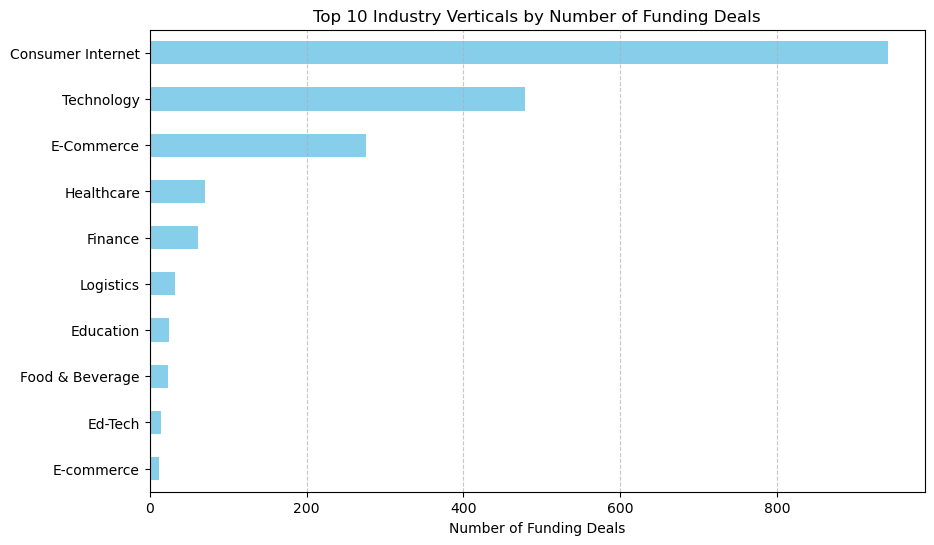

In [157]:
# Calculate the number of funding deals for each industry vertical and select the top 10
top_industry_verticals = df['industry_vertical'].value_counts().nlargest(10).sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_industry_verticals.plot(kind='barh', color='skyblue')
plt.title('Top 10 Industry Verticals by Number of Funding Deals')
plt.xlabel('Number of Funding Deals')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Top Industries:**

- Consumer Internet: Leading with the highest number of funding rounds (589 rounds).
- Technology: Second most active with 310 funding rounds.
- E-commerce: Significant presence with 170 funding rounds.

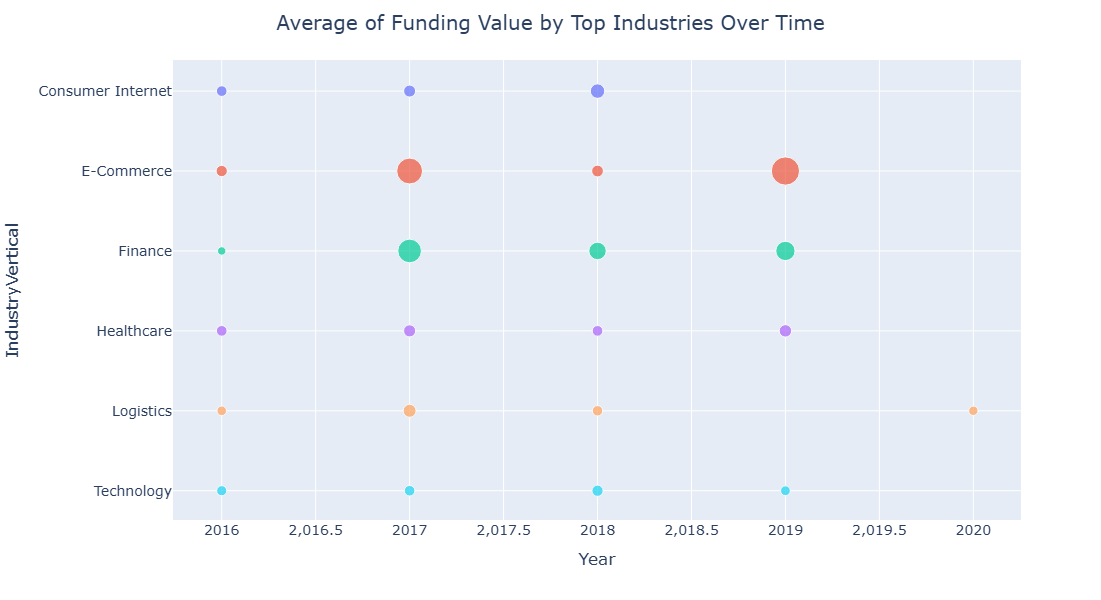

In [159]:
top_industries = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = df.groupby(["industry_vertical", "year"])['amount_USD'].agg(["size", "mean"]).reset_index()
temp_df = temp_df[temp_df["industry_vertical"].isin(top_industries)]
temp_df = temp_df[temp_df["year"] != 2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

# Create the scatter plot
fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Mean")

# Update layout
layout = go.Layout(
    title=go.layout.Title(
        text="Average of Funding Value by Top Industries Over Time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)

# Show plot
fig.show()

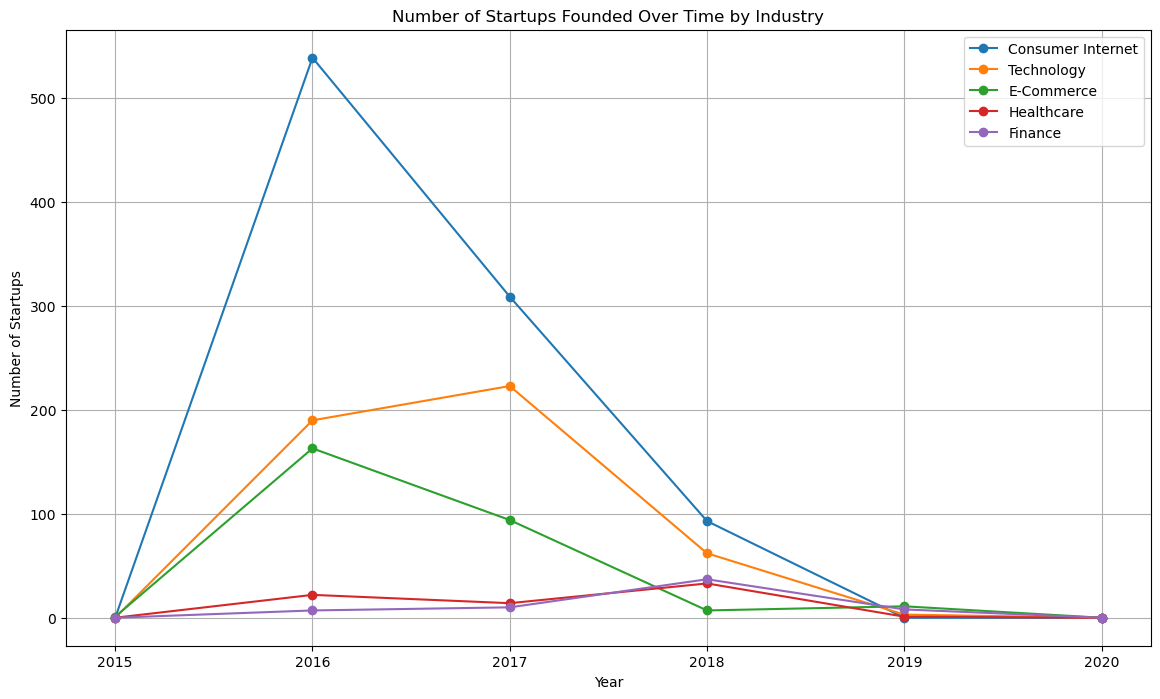

In [160]:
top_industries = df[df['industry_vertical'] != 'unknown']['industry_vertical'].value_counts().head(10).reset_index()

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract year and group by year and industry
df['year'] = df['date'].dt.year
yearly_industry_count = df.groupby(['year', 'industry_vertical']).size().unstack().fillna(0)

# List of top industries
top_industries_list = top_industries['industry_vertical'].head(5)

# Plotting the line plots for top industries over time
plt.figure(figsize=(14, 8))
for industry in top_industries_list:
    plt.plot(yearly_industry_count.index, yearly_industry_count[industry], marker='o', label=industry)
plt.title('Number of Startups Founded Over Time by Industry')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.legend()
plt.grid(True)
plt.show()


### Does Location also play a role, In determining the Growth of a Startup?

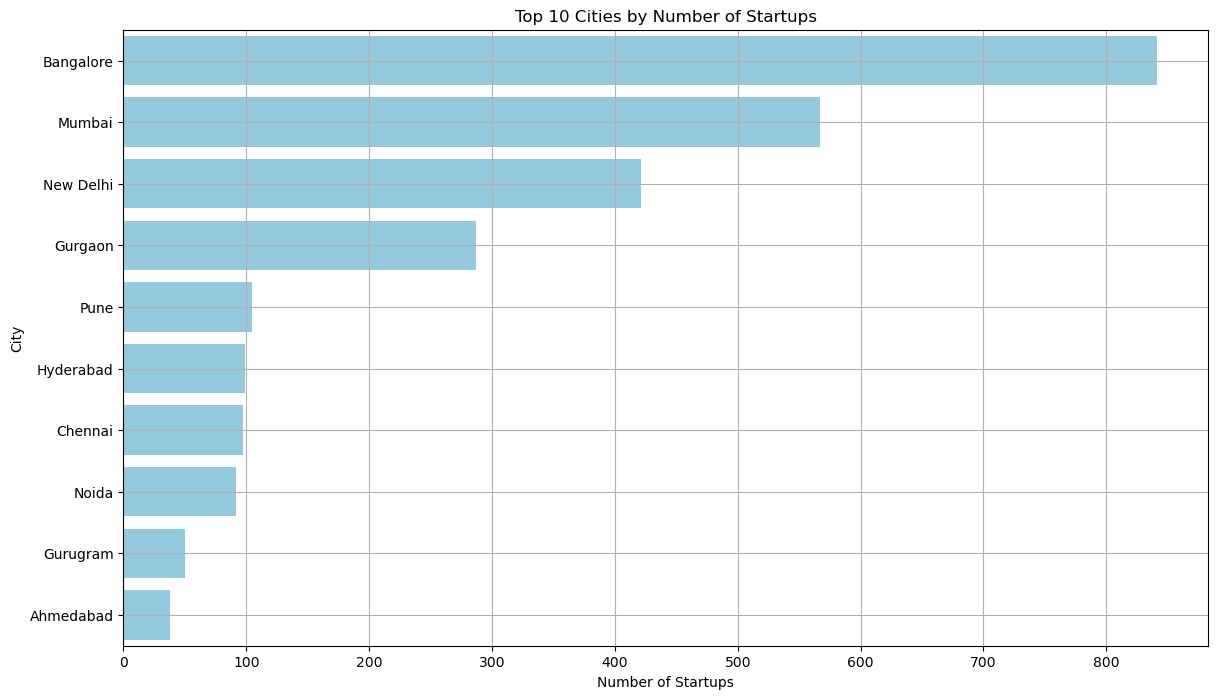

In [162]:
# Count the number of startups in each city
top_cities_count = df['city_location'].value_counts().head(10).reset_index()
top_cities_count.columns = ['City', 'Count']

# Plot the number of startups by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='City', data=top_cities_count, color='skyblue')
plt.title('Top 10 Cities by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.grid(True)
plt.show()

In [163]:
#!pip install folium

In [164]:
import folium
from folium.plugins import MarkerCluster

# Sample data: Coordinates for the cities
city_coords = {
    'City': ['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Hyderabad', 'Chennai', 'Noida', 'Gurugram', 'Ahmedabad'],
    'Latitude': [12.9716, 19.0760, 28.6139, 28.4595, 18.5204, 17.3850, 13.0827, 28.5355, 28.4595, 23.0225],
    'Longitude': [77.5946, 72.8777, 77.2090, 77.0266, 73.8567, 78.4867, 80.2707, 77.3910, 77.0266, 72.5714]
}

# Convert to DataFrame
city_coords_df = pd.DataFrame(city_coords)

# Calculate the number of startups
city_counts = df['city_location'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Merge with coordinates
city_counts = city_counts.merge(city_coords_df, on='City', how='left')

# Filter out NaN values
city_counts = city_counts.dropna(subset=['Latitude', 'Longitude'])

# Select all cities in the first graph
selected_cities = city_counts[city_counts['City'].isin(city_coords['City'])]

# Create a Folium map with the "dark" map style
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles='CartoDB dark_matter')  # Centered on India

# Add markers to the map for each city with the number of startups
marker_cluster = MarkerCluster().add_to(m)

for idx, row in selected_cities.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}: {row['Count']} Startups",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Display the map
m


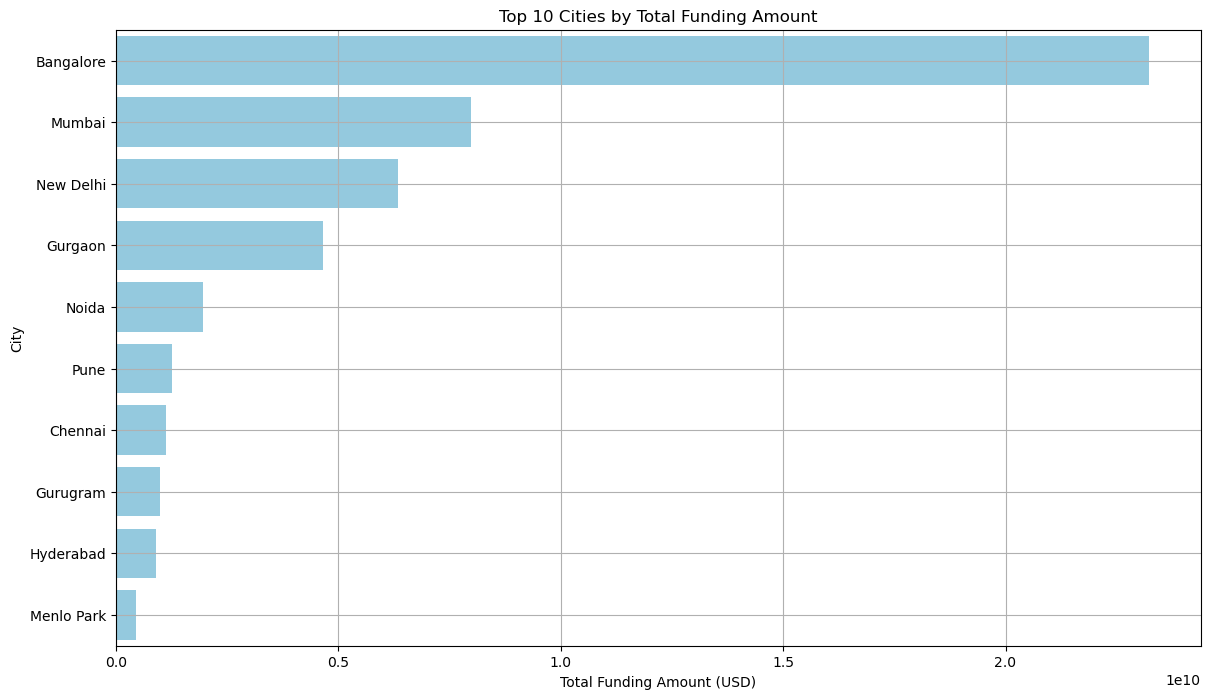

In [165]:
# Calculate the total funding amount received by startups in each city
top_cities_funding = df.groupby('city_location')['amount_USD'].sum().reset_index()
top_cities_funding = top_cities_funding.sort_values(by='amount_USD', ascending=False).head(10)
top_cities_funding.columns = ['City', 'Total Funding Amount']

# Plot the total funding amount by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Funding Amount', y='City', data=top_cities_funding, color='skyblue')
plt.title('Top 10 Cities by Total Funding Amount')
plt.xlabel('Total Funding Amount (USD)')
plt.ylabel('City')
plt.grid(True)
plt.show()


### Who plays the main role in Indian Startups Ecosystem?

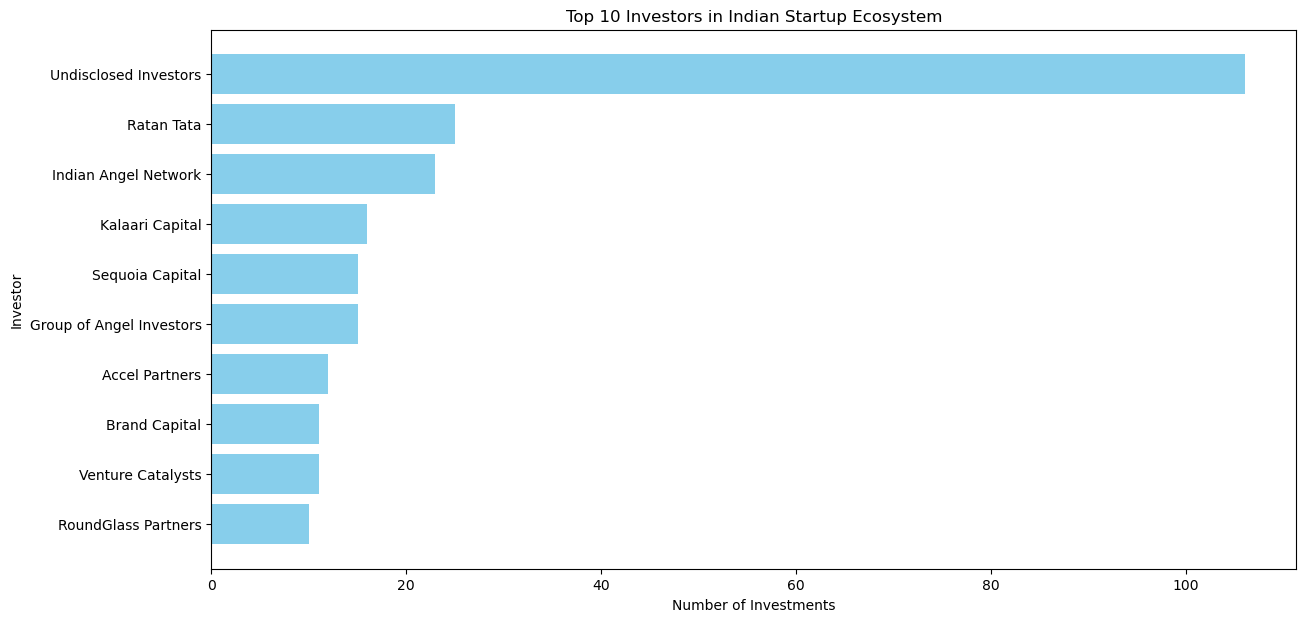

In [167]:
# Investor analysis
investor_funding = df['undisclosed_investor'].value_counts().reset_index()
investor_funding.columns = ['Investor', 'Number of Investments']

# Top 10 most invested investors
top_investors = investor_funding.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_investors['Investor'],
         top_investors['Number of Investments'],
         color='skyblue')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top 10 Investors in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()

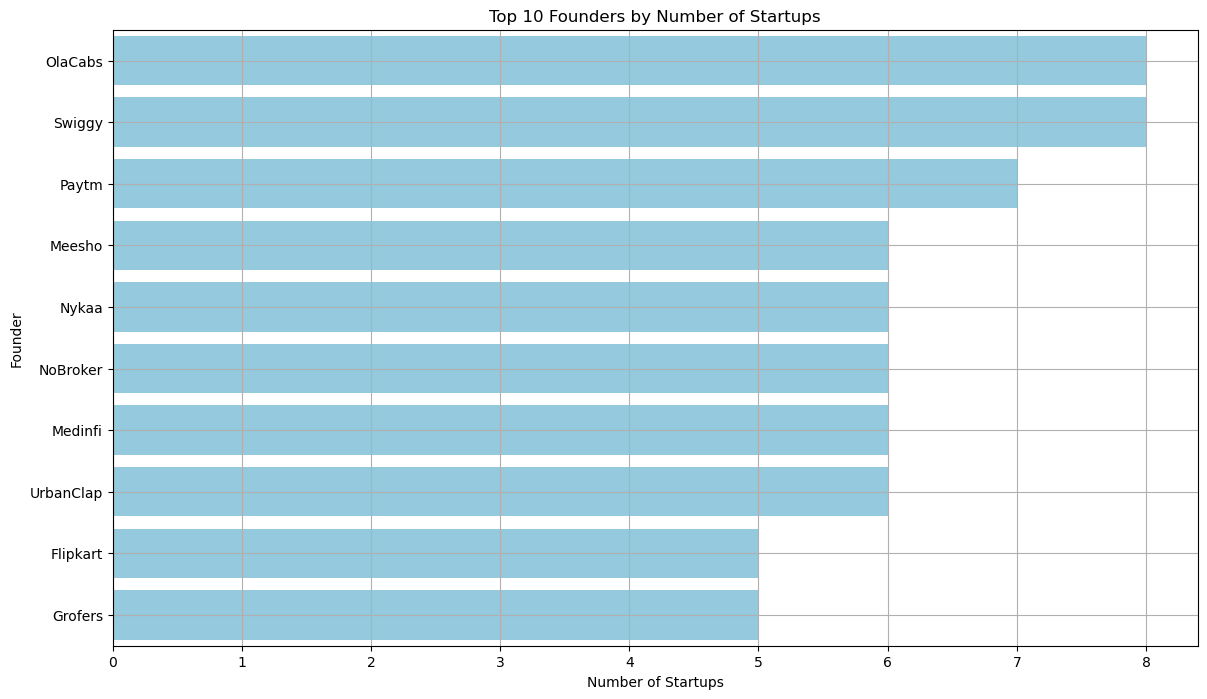

In [168]:
df['Founders'] = df['startup_name'].fillna('Unknown').str.split(',')

# Explode the list of founders into separate rows
founders_exploded = df.explode('Founders')

# Count the number of startups for each founder and select the top 10
top_founders = founders_exploded['Founders'].value_counts().head(10).reset_index()
top_founders.columns = ['Founder', 'Number of Startups']

# Plot the top founders
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Startups', y='Founder', data=top_founders, color='skyblue')
plt.title('Top 10 Founders by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Founder')
plt.grid(True)
plt.show()

### What are the different Types of Funding for Startups?

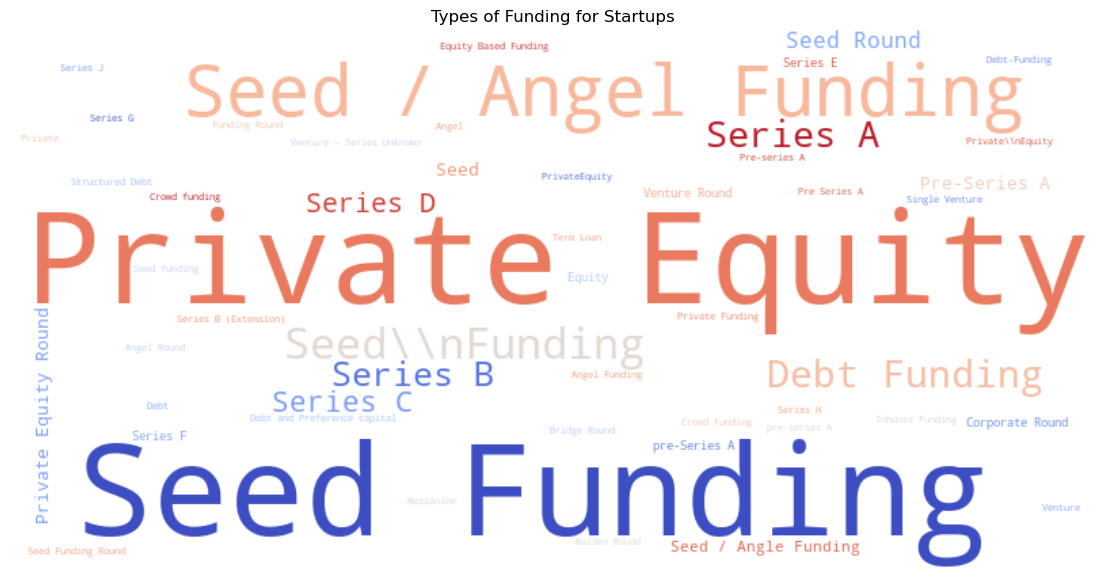

In [170]:
from wordcloud import WordCloud

# Count the number of each investment type
investment_types = df['investment_type'].value_counts().reset_index()
investment_types.columns = ['Investment Type', 'Number of Investments']

# Convert the investment types to a dictionary
investment_dict = dict(zip(investment_types['Investment Type'], investment_types['Number of Investments']))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(investment_dict)

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Types of Funding for Startups')
plt.show()

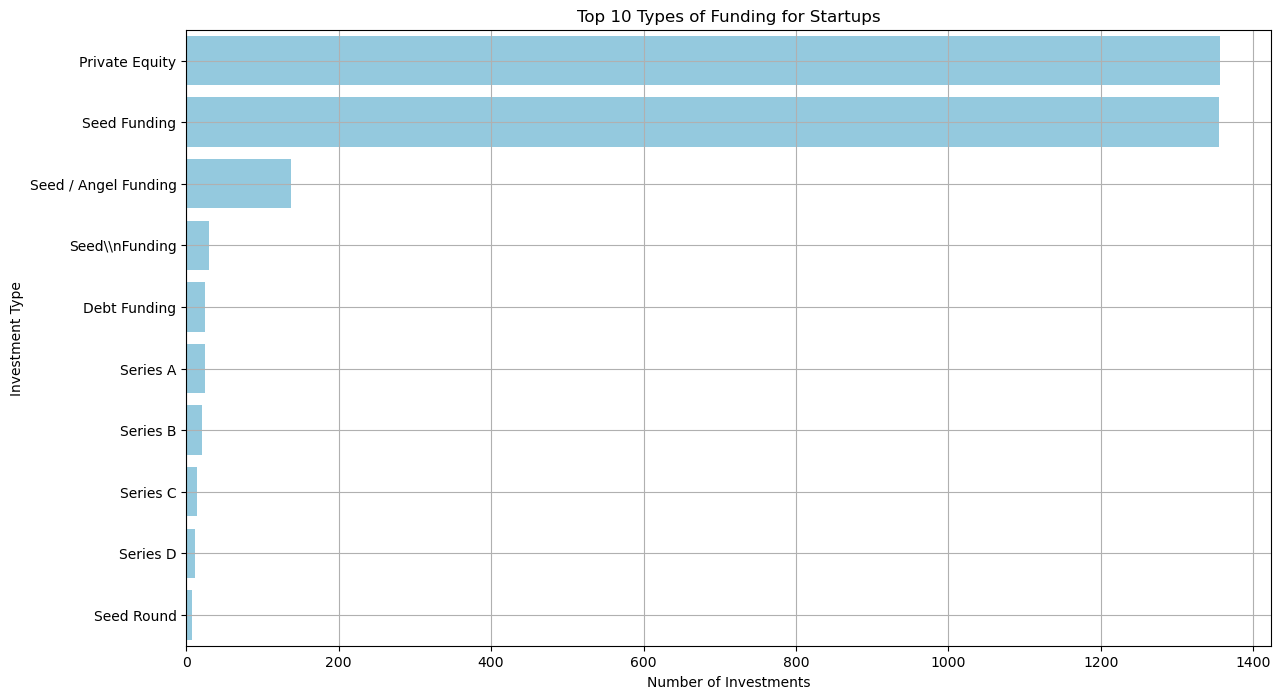

In [171]:
# Count the number of each investment type and select the top 10
investment_types = df['investment_type'].value_counts().head(10).reset_index()
investment_types.columns = ['Investment Type', 'Number of Investments']

# Plot the investment types
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Investments', y='Investment Type', data=investment_types, color='skyblue')
plt.title('Top 10 Types of Funding for Startups')
plt.xlabel('Number of Investments')
plt.ylabel('Investment Type')
plt.grid(True)
plt.show()

Private Equity: Most Common Funding Type: Private Equity is the most common funding type, with nearly 1,400 instances. This indicates that many startups in the dataset have reached a level of maturity where they can attract significant private equity investments.

## Conclusions

**Key Findings:**
1. **Funding Trends Over Time:**
   - There is a noticeable trend in the amount of funding received by startups over the years.
   - Certain years showed significant spikes in funding, indicating periods of high investor interest and economic growth.

2. **General Funding Amounts:**
   - The analysis revealed a wide range of funding amounts, with some startups receiving substantial investments.
   - The majority of startups received funding in specific ranges, highlighting the typical investment sizes.

3. **Industry Preferences:**
   - Industries such as Technology, E-Commerce, Healthcare, and Finance were among the top sectors receiving the most funding.
   - This indicates a strong investor preference for these sectors due to their high growth potential and market demand.

4. **Geographical Influence:**
   - Cities like Bangalore, Mumbai, and New Delhi emerged as the top locations for startup funding.
   - These cities provide a conducive environment for startups due to better infrastructure, access to investors, and a supportive ecosystem.

5. **Key Players in the Ecosystem:**
   - Analysis of investors revealed the top investors contributing to the startup ecosystem.
   - These investors played a significant role in nurturing and growing startups, providing not just funding but also mentorship and networking opportunities.

6. **Types of Funding:**
   - Various types of funding were identified, including Seed Funding, Series A, Series B, etc.
   - Each type of funding serves a different purpose, from initial product development to scaling operations and market expansion.

**Recommendations:**
1. **For Startups:**
   - **Focus on High-Growth Industries:** Startups should consider entering industries with high investor interest such as Technology, E-Commerce, and Healthcare.
   - **Leverage Geographical Advantages:** Establishing operations in startup hubs like Bangalore, Mumbai, and New Delhi can provide better access to funding and resources.
   - **Diversify Funding Sources:** Explore different types of funding and build relationships with multiple investors to secure necessary capital at various growth stages.

2. **For Investors:**
   - **Identify Emerging Sectors:** Stay updated with market trends to identify new and emerging sectors with high growth potential.
   - **Support Ecosystem Development:** Invest in building infrastructure and support systems in emerging startup hubs to foster innovation and growth.

The analysis of the startup funding dataset provides valuable insights into the dynamics of the Indian startup ecosystem. By understanding these trends, stakeholders can make informed decisions to foster growth and innovation in this vibrant sector.

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---
